In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import googlefinance
import fundamentalanalysis as fa
import numpy_financial as npf

### Financial analysis of Company Credit Suisse with the help of data downloaded with fundamental analysis API

#### https://pypi.org/project/fundamentalanalysis/

In [3]:
ticker = "CS"
api_key = "2655fb16de52a435d80c5c00a8ed6d82"

In [4]:
# Collect the Balance Sheet statements
balance_sheet_annually = fa.balance_sheet_statement(ticker, api_key, period= "annual", as_reported = False)

In [5]:
balance_sheet_annually.to_csv('credit_suisse_balance_statement.csv', index = True, sep =",")

In [6]:
balance_sheet_annually = pd.read_csv("credit_suisse_balance_statement.csv")

In [7]:
balance_sheet_annually.columns.values[0] = "Breakdown"

In [8]:
balance_sheet_annually

,Breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,reportedCurrency,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,...,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF
1,cik,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,...,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510
2,fillingDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
3,acceptedDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
4,calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
5,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
6,cashAndCashEquivalents,68933000000,166141000000,140410000000,102620000000,101189000000,110541000000,121933000000,93195000000,80593000000,...,53034000000,92047000000,42218000000,37168000000,33799488000,30552676000,27773293080,198507794700,207566036010,36939415300
7,shortTermInvestments,0,154000000,149000000,168000000,857000000,867000000,585000000,452000000,992000000,...,2508000000,3424000000,3529000000,4643000000,0,0,0,0,0,0
8,cashAndShortTermInvestments,68933000000,166295000000,140559000000,102788000000,102046000000,111408000000,122518000000,93647000000,81585000000,...,55542000000,95471000000,45747000000,41811000000,33799488000,30552676000,27773293080,198507794700,207566036010,36939415300
9,netReceivables,13818000000,19571000000,40196000000,40336000000,43962000000,51637000000,38218000000,40200000000,47866000000,...,51448000000,68843000000,69069000000,61628000000,0,0,0,12300820730,11862008850,55581344100


In [9]:
cashAndCashEquivalents = balance_sheet_annually.loc[6]

In [10]:
cashAndCashEquivalents

Breakdown    cashAndCashEquivalents
2022                    68933000000
2021                   166141000000
2020                   140410000000
2019                   102620000000
2018                   101189000000
2017                   110541000000
2016                   121933000000
2015                    93195000000
2014                    80593000000
2013                    70207000000
2012                    63708000000
2011                   112845000000
2010                    66991000000
2009                    53034000000
2008                    92047000000
2007                    42218000000
2006                    37168000000
2005                    33799488000
2004                    30552676000
2003                    27773293080
2002                   198507794700
2001                   207566036010
2000                    36939415300
Name: 6, dtype: object

In [12]:
year = []
cash = []
for k,v in cashAndCashEquivalents.items():
    if k!='Breakdown':
        year.append(int(k))
        cash.append(int(v))
        

In [14]:
df_cashAndCashEquivalents = pd.DataFrame({'year':year, 'cash': cash})

In [18]:
df_cashAndCashEquivalents

,year,cash
0,2022,68933000000
1,2021,166141000000
2,2020,140410000000
3,2019,102620000000
4,2018,101189000000
5,2017,110541000000
6,2016,121933000000
7,2015,93195000000
8,2014,80593000000
9,2013,70207000000


<function matplotlib.pyplot.show(close=None, block=None)>

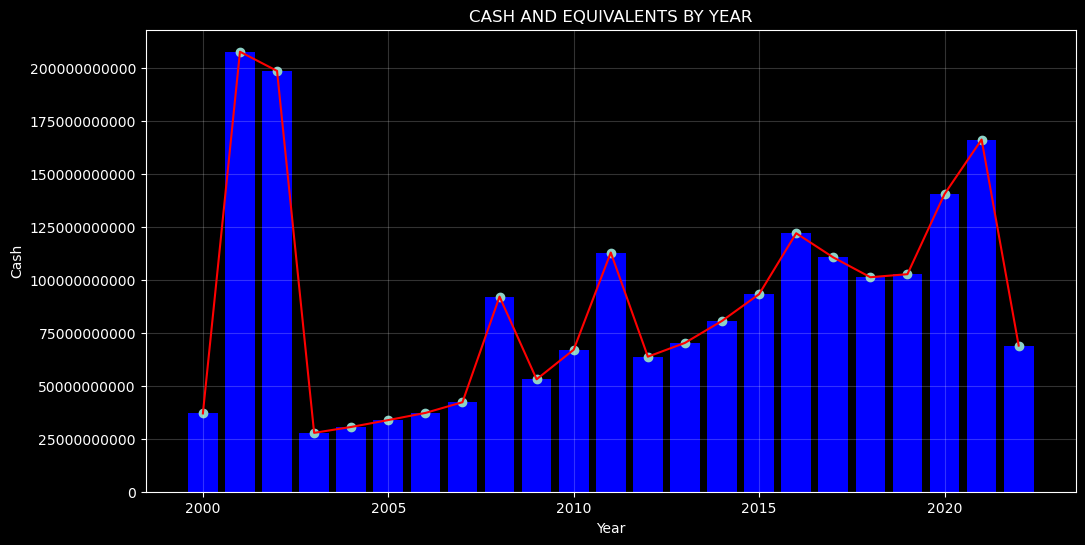

In [187]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_cashAndCashEquivalents.year, df_cashAndCashEquivalents.cash, color = "blue")
plt.plot(df_cashAndCashEquivalents.year, df_cashAndCashEquivalents.cash, color = "red")
plt.scatter(df_cashAndCashEquivalents.year, df_cashAndCashEquivalents.cash, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("CASH AND EQUIVALENTS BY YEAR")
plt.xlabel("Year")
plt.ylabel("Cash")
ax.grid(color = "white", alpha = 0.20)
plt.show

#### From Year 2003 this has been witmessed that that is a upward trend in cash and cash equivalent management, which clearly indicate the effecienct of management to maintain stable and healthy financial operation and have enough cash to cover it's short term obligation finanacial stability attract Investor and lenders.

### Net Recievable

In [38]:
net_recievable = balance_sheet_annually.loc[9]
net_recievable

Breakdown    netReceivables
2022            13818000000
2021            19571000000
2020            40196000000
2019            40336000000
2018            43962000000
2017            51637000000
2016            38218000000
2015            40200000000
2014            47866000000
2013            56904000000
2012            51629000000
2011            49536000000
2010            43927000000
2009            51448000000
2008            68843000000
2007            69069000000
2006            61628000000
2005                      0
2004                      0
2003                      0
2002            12300820730
2001            11862008850
2000            55581344100
Name: 9, dtype: object

In [42]:
year = []
receivables = []
for k,v in net_recievable.items():
    if k!='Breakdown':
        year.append(int(k))
        receivables.append(int(v))

df_net_recievable = pd.DataFrame({'year':year, 'receivables': receivables})
        

In [43]:
df_net_recievable

,year,receivables
0,2022,13818000000
1,2021,19571000000
2,2020,40196000000
3,2019,40336000000
4,2018,43962000000
5,2017,51637000000
6,2016,38218000000
7,2015,40200000000
8,2014,47866000000
9,2013,56904000000


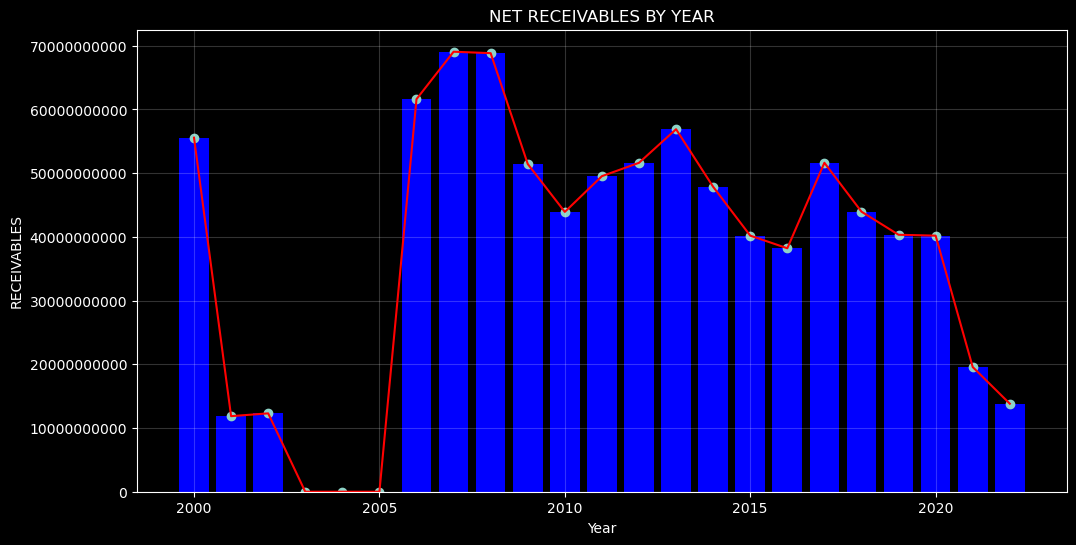

In [51]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_net_recievable.year, df_net_recievable.receivables, color = "blue")
plt.plot(df_net_recievable.year, df_net_recievable.receivables, color = "red")
plt.scatter(df_net_recievable.year, df_net_recievable.receivables, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("NET RECEIVABLES BY YEAR")
plt.xlabel("Year")
plt.ylabel("RECEIVABLES")
ax.grid(color = "white", alpha = 0.20)
plt.show()

### Negative News
#### Net recievable is measure of company's accounts recievable, which represent the amount of money owed to the company by it's customer for goods or services that have been delivered but yet not paid. this downward trend shows that hat customer are taking longer time to pay their bills or that the company is having triuble collecting the money owed to them.This lead to decrease in cash flow and impact company's financial health. it;s considered as bad indication.

In [73]:
propertyPlantEquipmentNet = balance_sheet_annually.loc[13]

In [74]:
year = []
propertyPlantEquipment = []
for k,v in propertyPlantEquipmentNet.items():
    if k!='Breakdown':
        year.append(int(k))
        propertyPlantEquipment.append(int(v))

df_propertyPlantEquipmentNet = pd.DataFrame({'year':year, 'propertyPlantEquipment': propertyPlantEquipment})
        

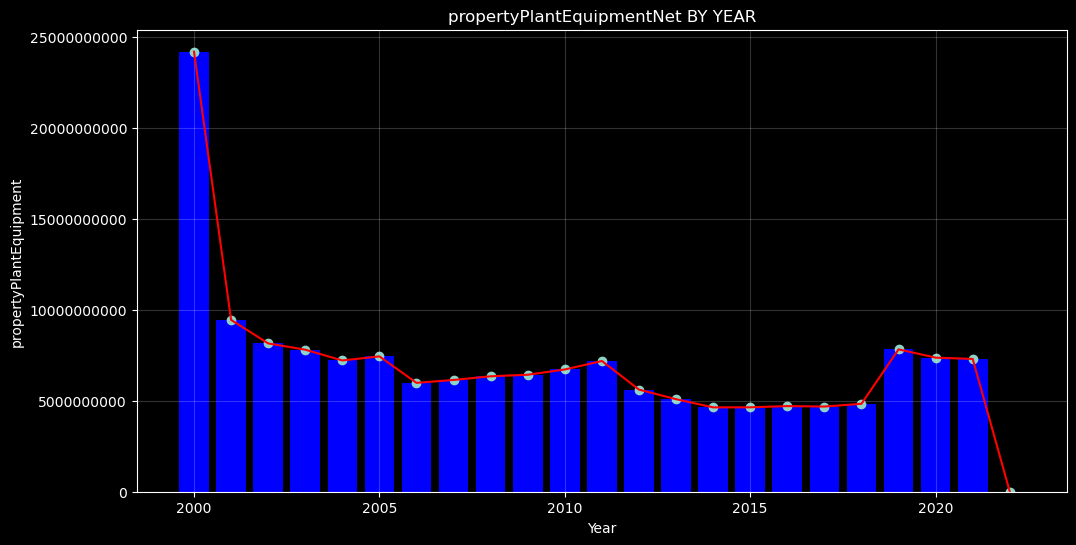

In [75]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_propertyPlantEquipmentNet.year, df_propertyPlantEquipmentNet.propertyPlantEquipment, color = "blue")
plt.plot(df_propertyPlantEquipmentNet.year, df_propertyPlantEquipmentNet.propertyPlantEquipment, color = "red")
plt.scatter(df_propertyPlantEquipmentNet.year, df_propertyPlantEquipmentNet.propertyPlantEquipment, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("propertyPlantEquipmentNet BY YEAR")
plt.xlabel("Year")
plt.ylabel("propertyPlantEquipment")
ax.grid(color = "white", alpha = 0.20)
plt.show()

### Negative Indicator
Ppoperty Plant Equipment-  As per the trend, downward trend in clearly visible in PPE, and propety value is declining.  this is also due to increase competetion in market for a type od property.

In [63]:
totalAssets = balance_sheet_annually.loc[22]

In [66]:
year = []
totalAsset = []
for k,v in totalAssets.items():
    if k!='Breakdown':
        year.append(int(k))
        totalAsset.append(int(v))

df_totalAssets = pd.DataFrame({'year':year, 'totalAssets': totalAsset})
        

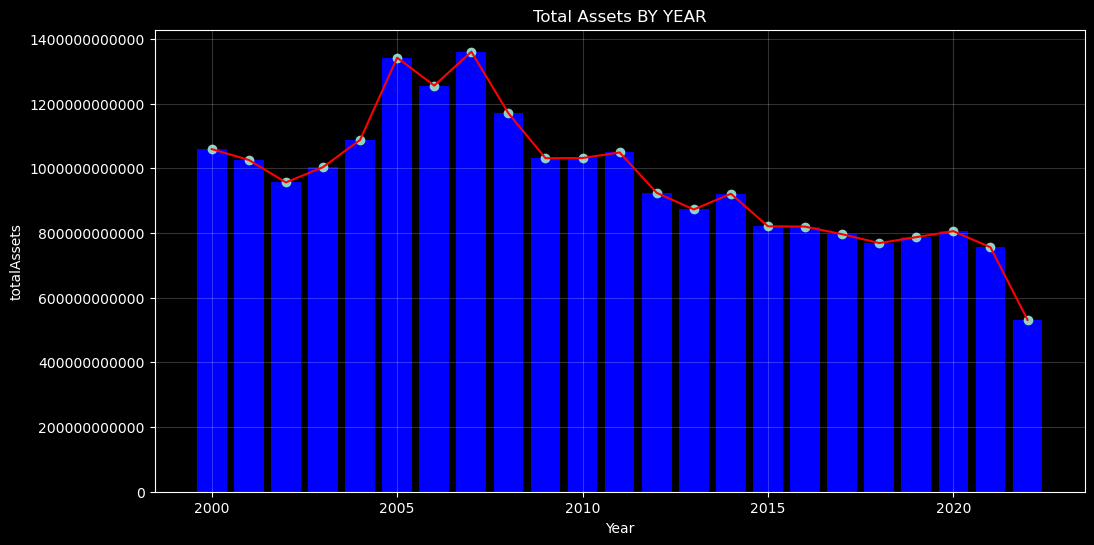

In [68]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_totalAssets.year, df_totalAssets.totalAssets, color = "blue")
plt.plot(df_totalAssets.year, df_totalAssets.totalAssets, color = "red")
plt.scatter(df_totalAssets.year, df_totalAssets.totalAssets, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("Total Assets BY YEAR")
plt.xlabel("Year")
plt.ylabel("totalAssets")
ax.grid(color = "white", alpha = 0.20)
plt.show()

A decrease in assets ca have several reason, such as decrease in sales, poor investment decision, or increasing debt. this also indicate the comnpany not performing well.

### Comparition of Totals Assets

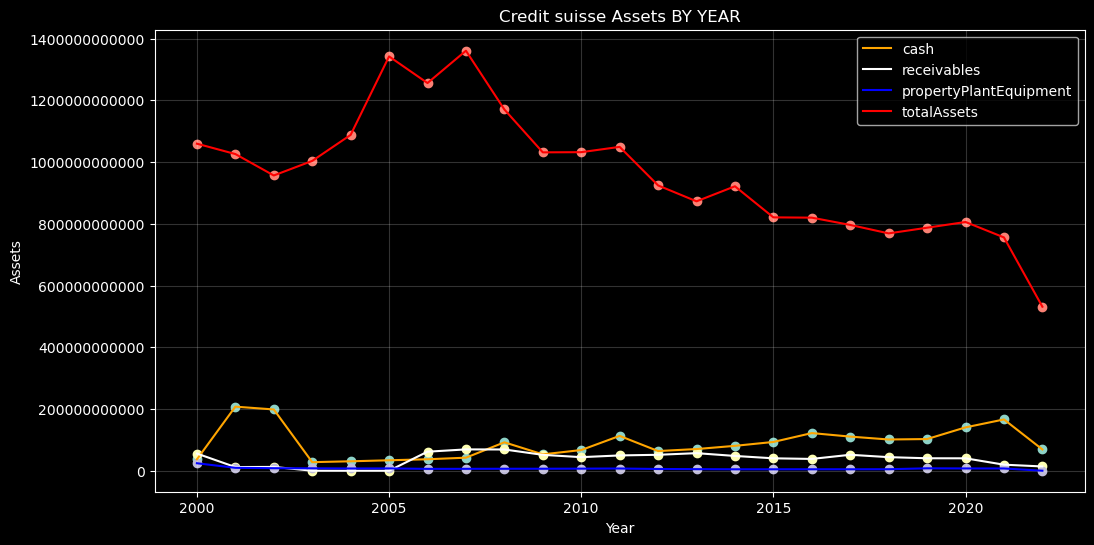

In [85]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
# Cash and cash equivalent
plt.plot(df_cashAndCashEquivalents.year, df_cashAndCashEquivalents.cash, color = "orange", label = "cash")
plt.scatter(df_cashAndCashEquivalents.year, df_cashAndCashEquivalents.cash, marker = "o")
# net recievable
plt.plot(df_net_recievable.year, df_net_recievable.receivables, color = "white", label = "receivables")
plt.scatter(df_net_recievable.year, df_net_recievable.receivables, marker = "o")
# ppe
plt.plot(df_propertyPlantEquipmentNet.year, df_propertyPlantEquipmentNet.propertyPlantEquipment, color = "b", label = "propertyPlantEquipment")
plt.scatter(df_propertyPlantEquipmentNet.year, df_propertyPlantEquipmentNet.propertyPlantEquipment, marker = "o")
# total assets
plt.plot(df_totalAssets.year, df_totalAssets.totalAssets, color = "red", label = "totalAssets")
plt.scatter(df_totalAssets.year, df_totalAssets.totalAssets, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("Credit suisse Assets BY YEAR")

plt.xlabel("Year")
plt.ylabel("Assets")
ax.grid(color = "white", alpha = 0.20)
plt.legend(loc = "upper right")
plt.show()

1. We can see all credit suisse group cash and equivalent were improved since
2012 to 2021. there are sudden drop on 2022.
2. Net receivables and property and plant equipments were movig downwards
since 2020
3. Total assets represented with blue lines, total assets are showing downward
trend since 2007 to 2020. there is sudden drop between 2021 - 2022

### LIABILITES

In [148]:
balance_sheet_annually

,Breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,reportedCurrency,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,...,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF
1,cik,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,...,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510
2,fillingDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
3,acceptedDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
4,calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
5,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
6,cashAndCashEquivalents,68933000000,166141000000,140410000000,102620000000,101189000000,110541000000,121933000000,93195000000,80593000000,...,53034000000,92047000000,42218000000,37168000000,33799488000,30552676000,27773293080,198507794700,207566036010,36939415300
7,shortTermInvestments,0,154000000,149000000,168000000,857000000,867000000,585000000,452000000,992000000,...,2508000000,3424000000,3529000000,4643000000,0,0,0,0,0,0
8,cashAndShortTermInvestments,68933000000,166295000000,140559000000,102788000000,102046000000,111408000000,122518000000,93647000000,81585000000,...,55542000000,95471000000,45747000000,41811000000,33799488000,30552676000,27773293080,198507794700,207566036010,36939415300
9,netReceivables,13818000000,19571000000,40196000000,40336000000,43962000000,51637000000,38218000000,40200000000,47866000000,...,51448000000,68843000000,69069000000,61628000000,0,0,0,12300820730,11862008850,55581344100


In [152]:
accountPayables = balance_sheet_annually.loc[23]

In [154]:
year = []
accountPayable = []
for k,v in accountPayables.items():
    if k!='Breakdown':
        year.append(int(k))
        accountPayable.append(int(v))

df_accountPayables = pd.DataFrame({'year':year, 'accountPayable': accountPayable})
        

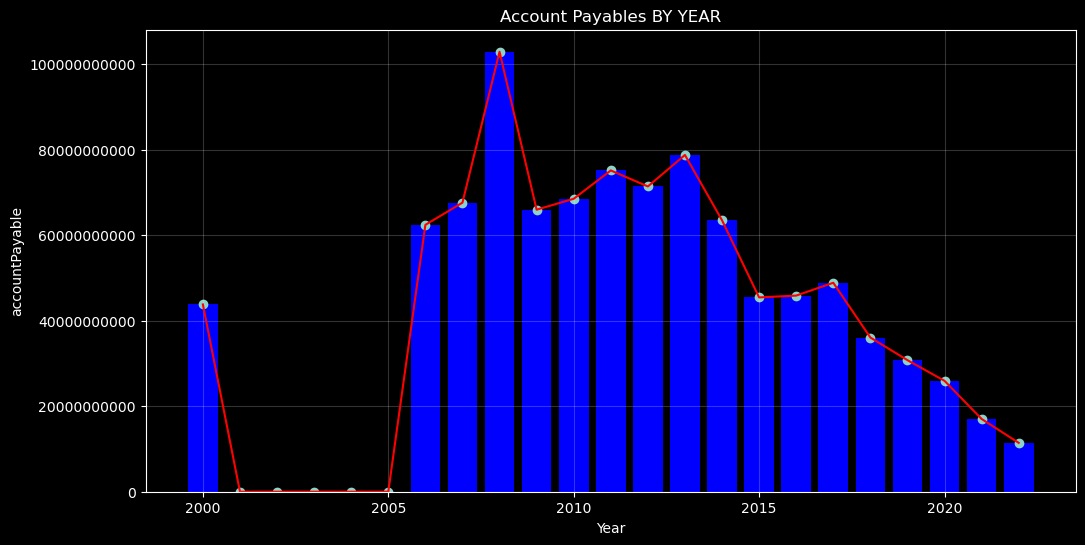

In [156]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_accountPayables.year, df_accountPayables.accountPayable, color = "blue")
plt.plot(df_accountPayables.year, df_accountPayables.accountPayable, color = "red")
plt.scatter(df_accountPayables.year, df_accountPayables.accountPayable, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("Account Payables BY YEAR")
plt.xlabel("Year")
plt.ylabel("accountPayable")
ax.grid(color = "white", alpha = 0.20)
plt.show()

Decline in AP is can happen due to following reasonable one of them could be that company have paid their bills and have a better understanding with suppliers and vendor and manging the payment terms no, other reason could be company have reduce their dependency on credit slowly, this can a positive sign to investor another reason could be negative that due short of cash and liquidity company is unable to pay and clear bills to supplier

### longtermdebt

In [157]:
longtermdebt = balance_sheet_annually.loc[29]

In [172]:
year = []
longtermdebtvalue = []
for k,v in longtermdebt.items():
    if k!='Breakdown':
        year.append(int(k))
        longtermdebtvalue.append(int(v))

df_longtermdebt = pd.DataFrame({'year':year, 'longtermdebts': longtermdebtvalue})
        

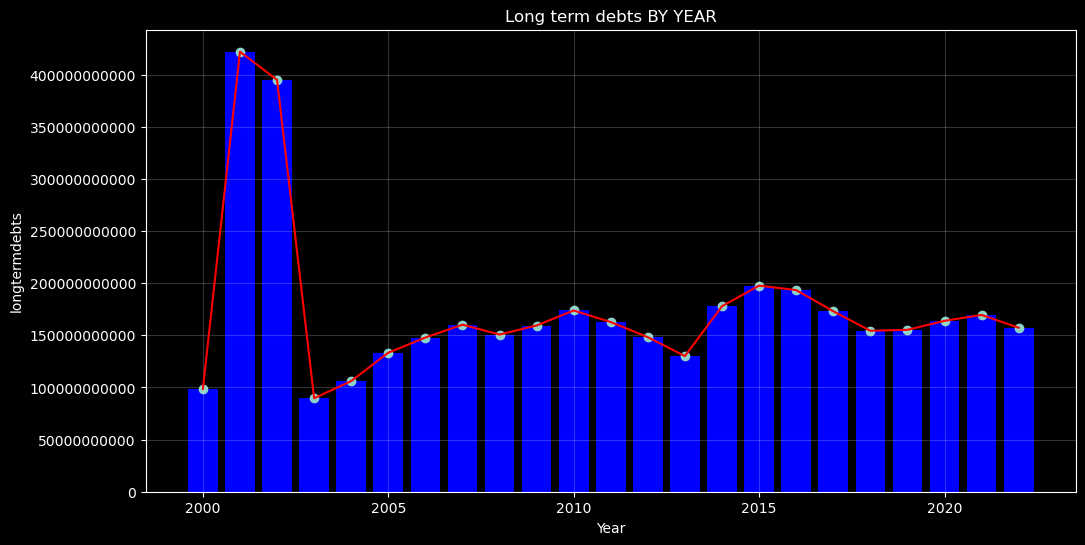

In [173]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_longtermdebt.year, df_longtermdebt.longtermdebts, color = "blue")
plt.plot(df_longtermdebt.year, df_longtermdebt.longtermdebts, color = "red")
plt.scatter(df_longtermdebt.year, df_longtermdebt.longtermdebts, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("Long term debts BY YEAR")
plt.xlabel("Year")
plt.ylabel("longtermdebts")
ax.grid(color = "white", alpha = 0.20)
plt.show()

Not much chnage in long term debt hende impact seems to be not much

In [160]:
totalLiabilities = balance_sheet_annually.loc[36]

In [177]:
year = []
total_Liabilities = []
for k,v in totalLiabilities.items():
    if k!='Breakdown':
        year.append(int(k))
        total_Liabilities.append(int(v))

df_totalLiabilities = pd.DataFrame({'year':year, 'totalLiabilities_value': total_Liabilities})
        

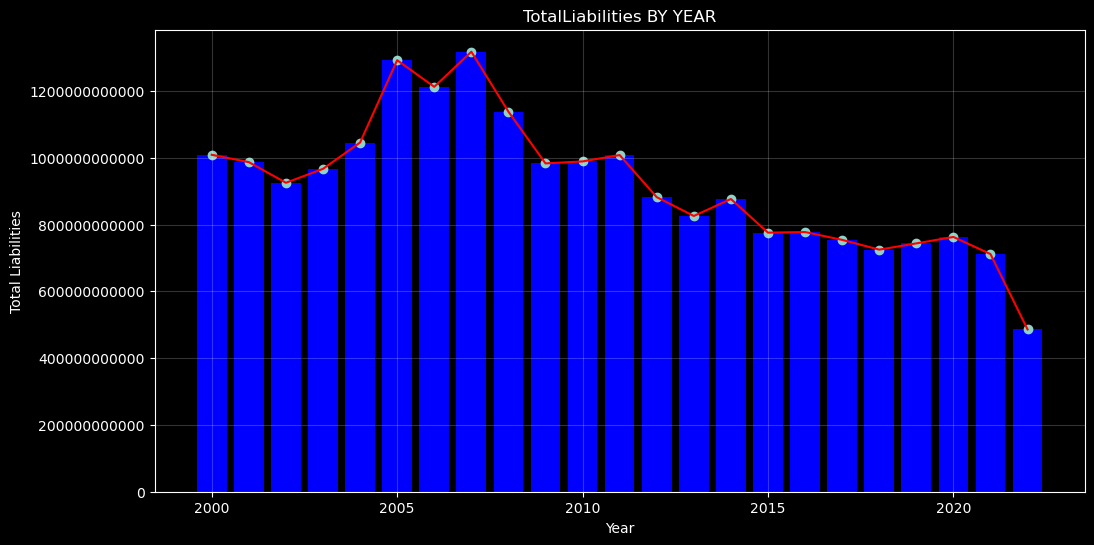

In [180]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_totalLiabilities.year, df_totalLiabilities.totalLiabilities_value, color = "blue")
plt.plot(df_totalLiabilities.year, df_totalLiabilities.totalLiabilities_value, color = "red")
plt.scatter(df_totalLiabilities.year, df_totalLiabilities.totalLiabilities_value, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("TotalLiabilities BY YEAR")
plt.xlabel("Year")
plt.ylabel("Total Liabilities")
ax.grid(color = "white", alpha = 0.20)
plt.show()

This downward trend in total liabalities shows a positive indication for companies health, this could mean company decreasing the liablity by paying od debt and manging it's financial obligation more efficiently

### COMPARISION OF CREDIT SUISSE GROUP LIABILITES

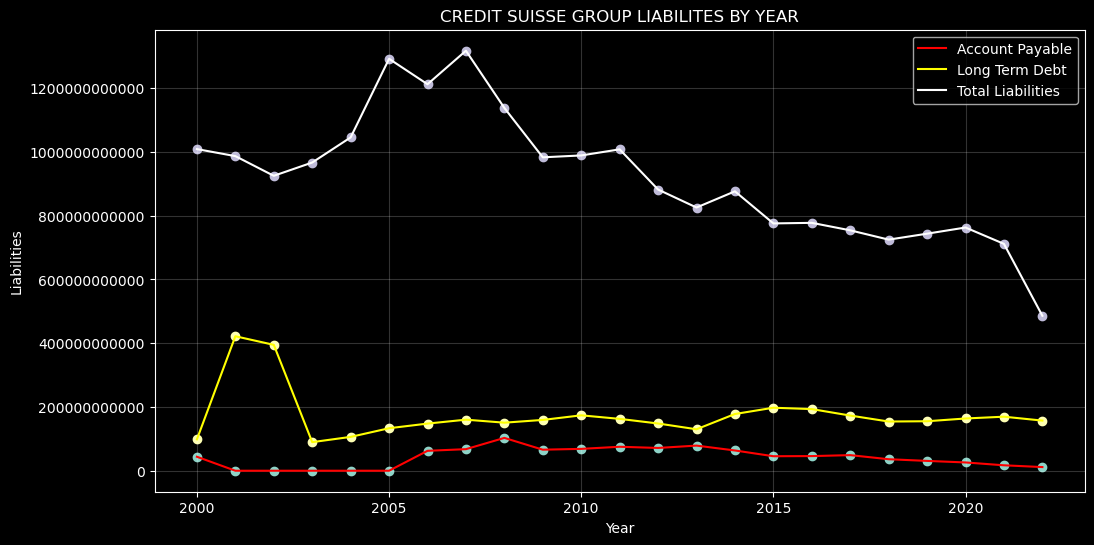

In [183]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
# Account Payable
plt.plot(df_accountPayables.year, df_accountPayables.accountPayable, color = "red", label = "Account Payable")
plt.scatter(df_accountPayables.year, df_accountPayables.accountPayable, marker = "o")
# Long term liablities
plt.plot(df_longtermdebt.year, df_longtermdebt.longtermdebts, color = "yellow", label = "Long Term Debt")
plt.scatter(df_longtermdebt.year, df_longtermdebt.longtermdebts, marker = "o")
# Total Liablities
plt.plot(df_totalLiabilities.year, df_totalLiabilities.totalLiabilities_value, color = "White", label = "Total Liabilities")
plt.scatter(df_totalLiabilities.year, df_totalLiabilities.totalLiabilities_value, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("CREDIT SUISSE GROUP LIABILITES BY YEAR")
plt.xlabel("Year")
plt.ylabel("Liabilities")
ax.grid(color = "white", alpha = 0.20)
plt.legend(loc = "upper right")
plt.show()


COMPARISION BETWEEN ASSETS AND LIABILITIES

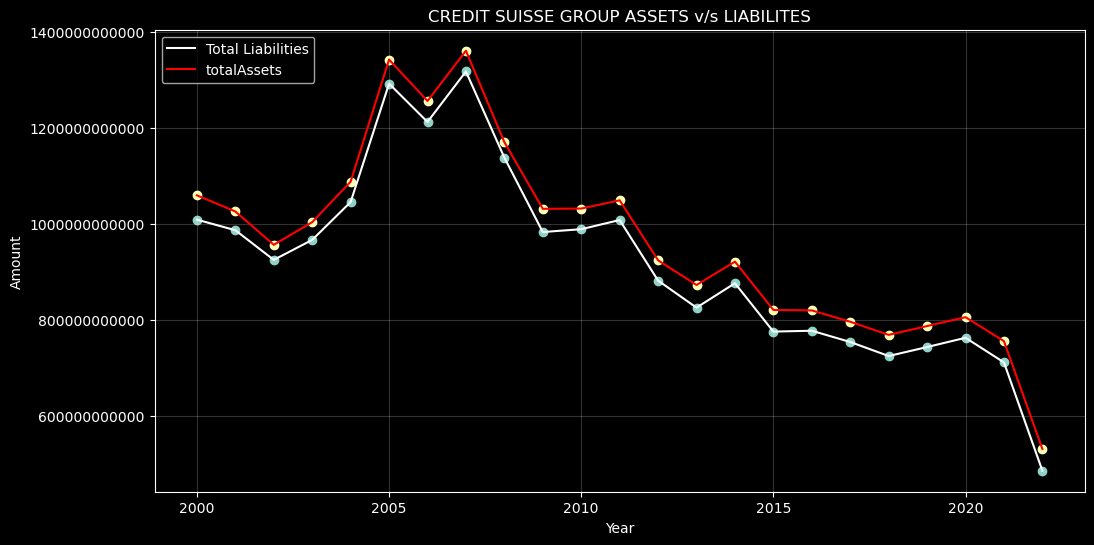

In [191]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
#Total liabilities
plt.plot(df_totalLiabilities.year, df_totalLiabilities.totalLiabilities_value, color = "White", label = "Total Liabilities")
plt.scatter(df_totalLiabilities.year, df_totalLiabilities.totalLiabilities_value, marker = "o")
#total assets
plt.plot(df_totalAssets.year, df_totalAssets.totalAssets, color = "red", label = "totalAssets")
plt.scatter(df_totalAssets.year, df_totalAssets.totalAssets, marker = "o")
plt.ticklabel_format(axis='y', style='plain')
plt.title("CREDIT SUISSE GROUP ASSETS v/s LIABILITES")
plt.xlabel("Year")
plt.ylabel("Amount")
ax.grid(color='white', alpha=0.20)
plt.legend(loc="upper left")
plt.show()

#### SHAREHOLDERS' EQUITY

In [202]:
balance_sheet_annually

,Breakdown,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,reportedCurrency,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,...,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF,CHF
1,cik,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,...,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510,0001159510
2,fillingDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
3,acceptedDate,2022-12-31,2021-12-31,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,...,2009-12-31,2008-12-31,2007-12-31,2006-12-31,2005-12-31,2004-12-31,2003-12-31,2002-12-31,2001-12-31,2000-12-31
4,calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
5,period,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
6,cashAndCashEquivalents,68933000000,166141000000,140410000000,102620000000,101189000000,110541000000,121933000000,93195000000,80593000000,...,53034000000,92047000000,42218000000,37168000000,33799488000,30552676000,27773293080,198507794700,207566036010,36939415300
7,shortTermInvestments,0,154000000,149000000,168000000,857000000,867000000,585000000,452000000,992000000,...,2508000000,3424000000,3529000000,4643000000,0,0,0,0,0,0
8,cashAndShortTermInvestments,68933000000,166295000000,140559000000,102788000000,102046000000,111408000000,122518000000,93647000000,81585000000,...,55542000000,95471000000,45747000000,41811000000,33799488000,30552676000,27773293080,198507794700,207566036010,36939415300
9,netReceivables,13818000000,19571000000,40196000000,40336000000,43962000000,51637000000,38218000000,40200000000,47866000000,...,51448000000,68843000000,69069000000,61628000000,0,0,0,12300820730,11862008850,55581344100


In [203]:
common_Stock = balance_sheet_annually.loc[38]
retained_Earnings = balance_sheet_annually.loc[39]
total_Stockholders_Equity = balance_sheet_annually.loc[42]
total_LiabilitiesAndTotalEquity = balance_sheet_annually.loc[43]

In [205]:
year = []
common_stocks = []
retained_earnings = []
total_share_holder_equitys = []
total_liabilities_and_shareholders_equitys = []
#Common stock
for k, v in common_Stock.items():
    if k != 'Breakdown': # skip the header
        year.append(int(k))
        common_stocks.append(int(v))
#Retained earning
for k, v in retained_Earnings.items():
    if k != 'Breakdown': # skip the header
        retained_earnings.append(int(v))
#Total share holder equity
for k, v in total_Stockholders_Equity.items():
    if k != 'Breakdown': # skip the header
        total_share_holder_equitys.append(int(v))
#Total liabilities and share holders equity
for k, v in total_LiabilitiesAndTotalEquity.items():
    if k != 'Breakdown': # skip the header
        total_liabilities_and_shareholders_equitys.append(int(v))

In [206]:
len(year), len(common_stocks), len(total_liabilities_and_shareholders_equitys)


(23, 23, 23)

In [209]:
df_equity = pd.DataFrame({'year':year,
                          'common_stock':common_stocks,
                          'retained_earnings':retained_earnings,'total_share_holder_equity':total_share_holder_equitys,
                          'total_liabilities_and_shareholders_equitys':total_liabilities_and_shareholders_equitys})

In [217]:
df_equity

,year,common_stock,retained_earnings,total_share_holder_equity,total_liabilities_and_shareholders_equitys
0,2022,160000000,23632000000,45129000000,531156000000
1,2021,106000000,31064000000,43954000000,755557000000
2,2020,98000000,32834000000,42677000000,805558000000
3,2019,102000000,30634000000,43644000000,787225000000
4,2018,102000000,26973000000,43922000000,768819000000
5,2017,102000000,24973000000,41902000000,796002000000
6,2016,84000000,25954000000,41897000000,819447000000
7,2015,78000000,29139000000,44382000000,820169000000
8,2014,64000000,32083000000,43959000000,920420000000
9,2013,64000000,30261000000,42164000000,867804000000


### COMMON STOCK

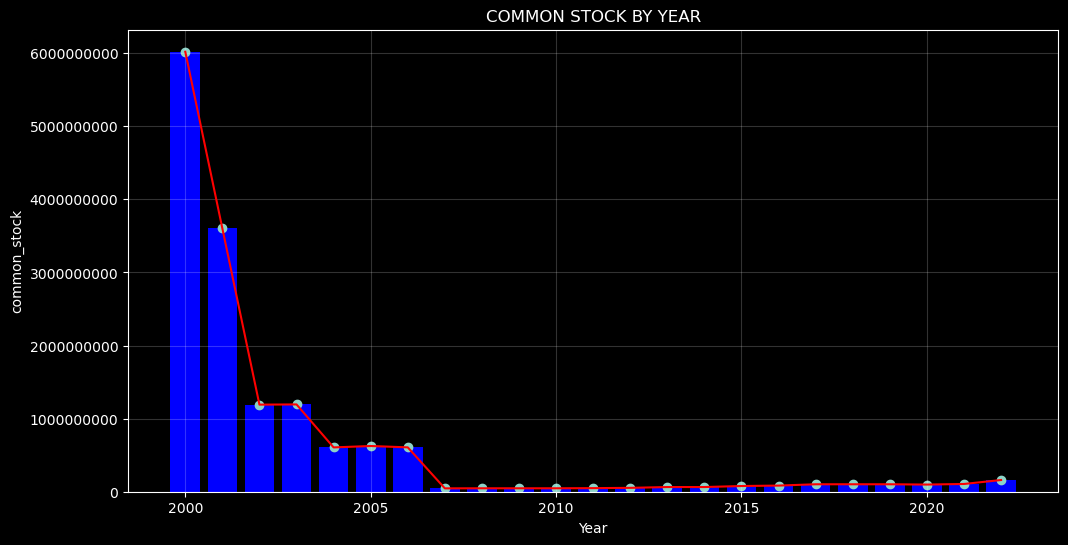

In [213]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_equity.year, df_equity.common_stock, color = "blue")
plt.plot(df_equity.year, df_equity.common_stock, color = "red")
plt.scatter(df_equity.year, df_equity.common_stock, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("COMMON STOCK BY YEAR")
plt.xlabel("Year")
plt.ylabel("common_stock")
ax.grid(color = "white", alpha = 0.20)
plt.show()

A decrease in common stock could mean that the company is buying back its own
shares, which can have several reasons such as increasing earnings per share or
returning cash to shareholders. Alternatively, it could also mean that the company is
issuing fewer shares or that investors are selling their shares in the company

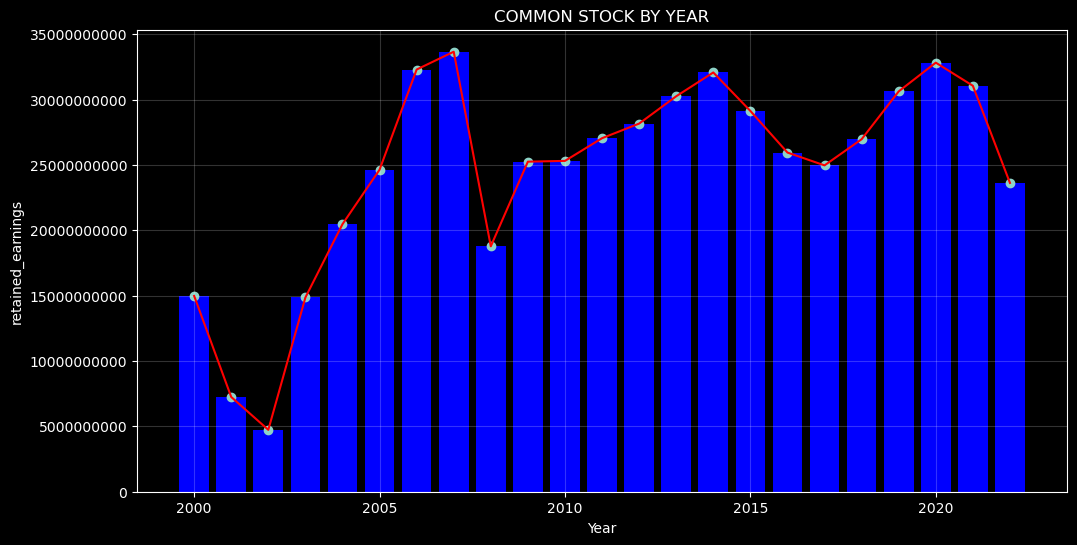

In [218]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_equity.year, df_equity.retained_earnings, color = "blue")
plt.plot(df_equity.year, df_equity.retained_earnings, color = "red")
plt.scatter(df_equity.year, df_equity.retained_earnings, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("COMMON STOCK BY YEAR")
plt.xlabel("Year")
plt.ylabel("retained_earnings")
ax.grid(color = "white", alpha = 0.20)
plt.show()

Retained earnings of Credit Suisse may have been impacted by a variety of factors,
such as changes in accounting policies, corporate actions, and economic conditions.
Retained earning is above the last great recession on 2008.

### TOTAL SHARE HOLDER EQUITY

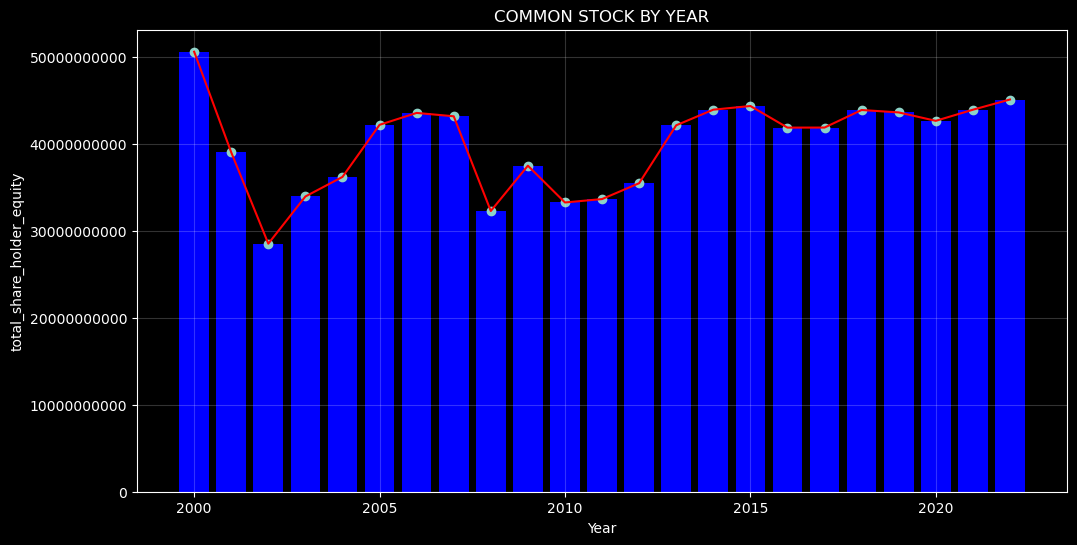

In [219]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_equity.year, df_equity.total_share_holder_equity, color = "blue")
plt.plot(df_equity.year, df_equity.total_share_holder_equity, color = "red")
plt.scatter(df_equity.year, df_equity.total_share_holder_equity, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("COMMON STOCK BY YEAR")
plt.xlabel("Year")
plt.ylabel("total_share_holder_equity")
ax.grid(color = "white", alpha = 0.20)
plt.show()

There is no irregular changes on share holder equity. it means that the shareholder
equity of the company has remained relatively stable over time, with no sudden or
unexpected fluctuations. This can be a positive sign for investors

### TOTAL LIABILITIES AND SHAREHOLDERS EQUITYS

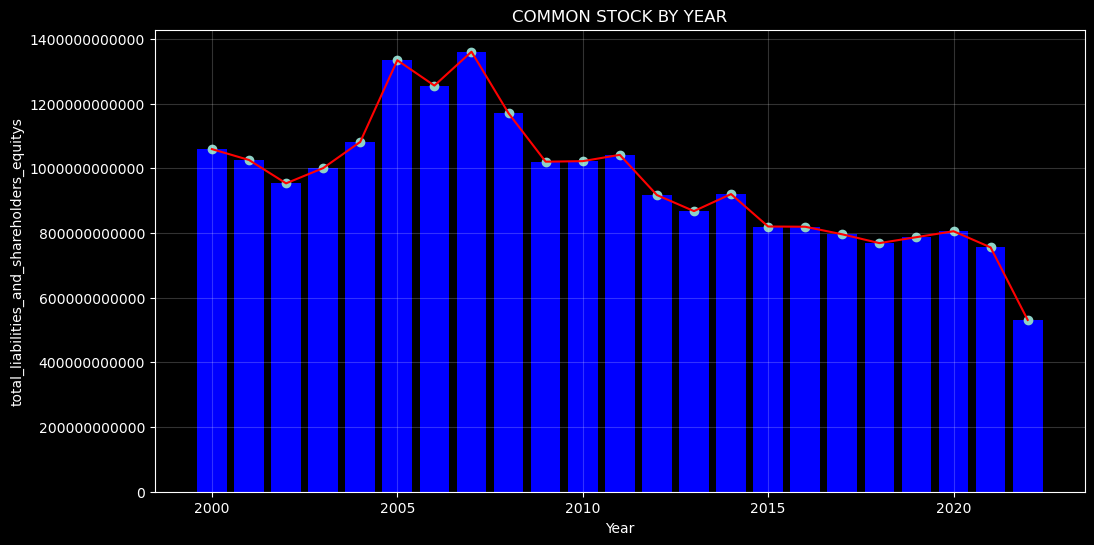

In [220]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(df_equity.year, df_equity.total_liabilities_and_shareholders_equitys, color = "blue")
plt.plot(df_equity.year, df_equity.total_liabilities_and_shareholders_equitys, color = "red")
plt.scatter(df_equity.year, df_equity.total_liabilities_and_shareholders_equitys, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("COMMON STOCK BY YEAR")
plt.xlabel("Year")
plt.ylabel("total_liabilities_and_shareholders_equitys")
ax.grid(color = "white", alpha = 0.20)
plt.show()

### INSIGHT INTO COMPANY EQUITY

In [221]:
from mpl_toolkits import mplot3d

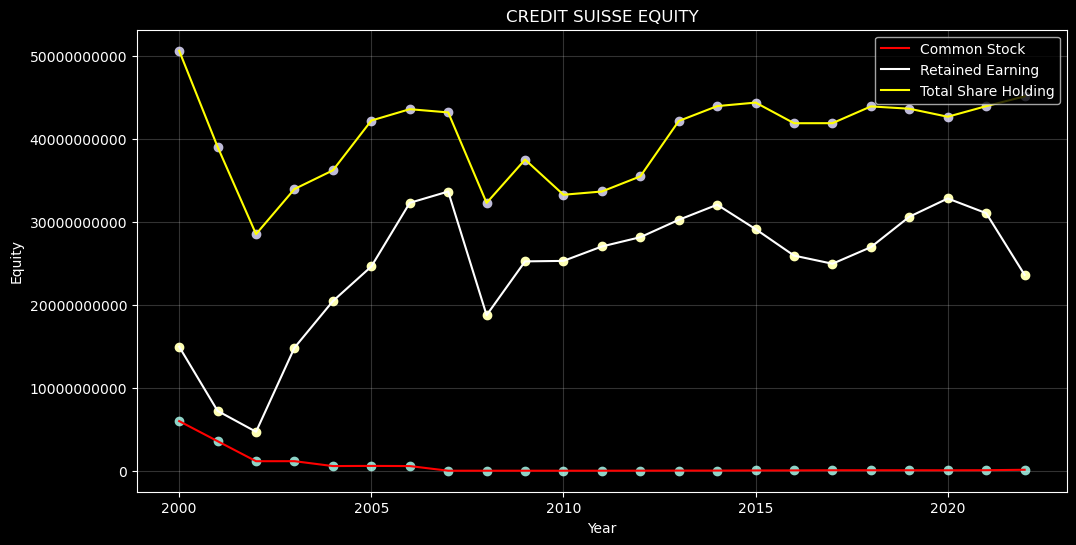

In [223]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
# Common Stock
plt.plot(df_equity.year, df_equity.common_stock, color = "red", label = "Common Stock")
plt.scatter(df_equity.year, df_equity.common_stock, marker = "o")
# Retained Earning
plt.plot(df_equity.year, df_equity.retained_earnings, color = "white", label = "Retained Earning")
plt.scatter(df_equity.year, df_equity.retained_earnings, marker = "o")
# Total Share holding
plt.plot(df_equity.year, df_equity.total_share_holder_equity, color = "yellow", label = "Total Share Holding")
plt.scatter(df_equity.year, df_equity.total_share_holder_equity, marker = "o")
ax.yaxis.get_major_formatter().set_scientific(False)
plt.title("CREDIT SUISSE EQUITY")
plt.xlabel("Year")
plt.ylabel("Equity")
ax.grid(color = "white", alpha = 0.20)
plt.legend(loc = "upper right")
plt.show()


Common stock represents the initial investment made by shareholders to purchase
ownership in the company. Retained earnings are profits earned by the company that
are not distributed as dividends to shareholders, but instead are kept for future
investments or to pay off debt. Total shareholder equity represents the total value of
the company that is attributable to its shareholders.
Common stock value may be listed first as it represents the initial investment made
by shareholders. Retained earnings may follow as they are a cumulative measure of
profits over time, and then total shareholder equity is listed last as it represents the
total value of the company's assets minus its liabilities.